# Simple Clustering Analysis
* Data: Water Treatment Plant Data Set from UCI Machine Learning Repository
* Link: [water tretment data](http://archive.ics.uci.edu/ml/datasets/Water+Treatment+Plant)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import silhouette_score

%matplotlib inline

print('Scikit-learn:\t', sklearn.__version__)
print('Numpy:\t\t', np.__version__)
print('Scipy:\t\t', sp.__version__)
print('Pandas:\t\t', pd.__version__)
print('Matplotlib:\t', mpl.__version__)

Scikit-learn:	 0.19.0
Numpy:		 1.13.1
Scipy:		 0.19.1
Pandas:		 0.20.3
Matplotlib:	 2.0.2


## Read Data

In [2]:
names = ['Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 
         'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 
         'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 
         'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 
         'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']
data = pd.read_csv('./data/Water/water-treatment.data', header=None, names=names, na_values='?')

## Exploratory Data Analysis

In [3]:
data.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
D-1/3/90,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
D-2/3/90,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
D-4/3/90,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, D-1/3/90 to D-30/8/91
Data columns (total 38 columns):
Q-E         509 non-null float64
ZN-E        524 non-null float64
PH-E        527 non-null float64
DBO-E       504 non-null float64
DQO-E       521 non-null float64
SS-E        526 non-null float64
SSV-E       516 non-null float64
SED-E       502 non-null float64
COND-E      527 non-null int64
PH-P        527 non-null float64
DBO-P       487 non-null float64
SS-P        527 non-null int64
SSV-P       516 non-null float64
SED-P       503 non-null float64
COND-P      527 non-null int64
PH-D        527 non-null float64
DBO-D       499 non-null float64
DQO-D       518 non-null float64
SS-D        525 non-null float64
SSV-D       514 non-null float64
SED-D       502 non-null float64
COND-D      527 non-null int64
PH-S        526 non-null float64
DBO-S       504 non-null float64
DQO-S       509 non-null float64
SS-S        522 non-null float64
SSV-S       510 non-null float64
SED-

In [5]:
data.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,509.000000,524.000000,527.000000,504.000000,521.000000,526.000000,516.000000,502.000000,527.000000,527.000000,...,526.000000,465.000000,523.000000,500.000000,487.000000,501.000000,491.000000,502.000000,519.000000,496.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6635.999806,2.749509,0.246175,62.062831,120.362974,135.940589,12.415264,2.743947,394.898019,0.226925,...,387.906161,14.792976,12.802547,8.944776,8.804256,11.617612,7.027651,8.888932,8.221612,4.457165
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32888.000000,0.900000,7.600000,146.750000,325.000000,170.000000,55.700000,3.100000,1201.000000,7.700000,...,1234.500000,29.300000,50.550000,88.600000,81.400000,63.100000,87.600000,74.000000,87.600000,99.300000
50%,35990.000000,1.500000,7.800000,182.500000,400.000000,196.000000,64.300000,4.500000,1406.000000,7.800000,...,1432.000000,39.600000,59.500000,93.300000,85.400000,69.900000,90.200000,79.150000,90.700000,99.700000
75%,41372.000000,3.000000,8.000000,223.000000,478.000000,242.000000,69.725000,5.500000,1672.000000,8.000000,...,1692.250000,49.200000,66.900000,96.000000,87.900000,75.300000,92.450000,83.400000,93.100000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [6]:
# check missing values
data.isnull().sum()

Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

## Feature Engineering

In [7]:
# fill missing values with median
columns = data.columns
for name in columns:
    data.loc[data[name].isnull(), name] = data[name].median(skipna=True)

# check missing values
np.sum(data.isnull().sum())

0

In [8]:
# scale the dataset
ndata = pd.DataFrame(preprocessing.scale(data), columns=columns, index=data.index)

## Fit Hierarchical Clustering Model (Scipy Model)

In [9]:
# fit the model
Z = hierarchy.linkage(ndata, method='ward', metric='euclidean')

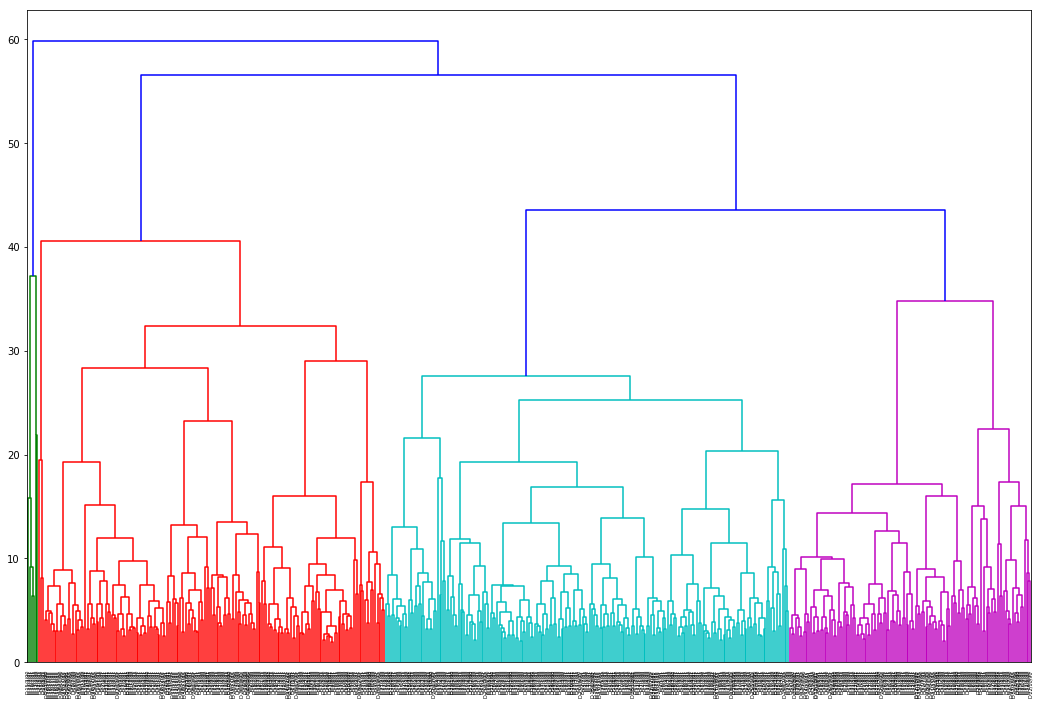

In [10]:
# visualization
fig, ax = plt.subplots(figsize=(18, 12))
dn = hierarchy.dendrogram(Z, labels=ndata.index)
plt.show()

## Fit Hierarchical Clustering Model

In [11]:
# fit model
h_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', memory=None, connectivity=None, 
                                  compute_full_tree='auto', linkage='ward')
h_pred = h_model.fit_predict(ndata)

## Fit K-Means Model

In [12]:
k_model = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                 precompute_distances='auto', verbose=0, n_jobs=-1, algorithm='auto')
k_pred = k_model.fit_predict(ndata)

## PCA

In [13]:
# fit PCA model
pca = PCA(n_components=2)
feature = pca.fit_transform(ndata)

x = feature[:, 0]
y = feature[:, 1]

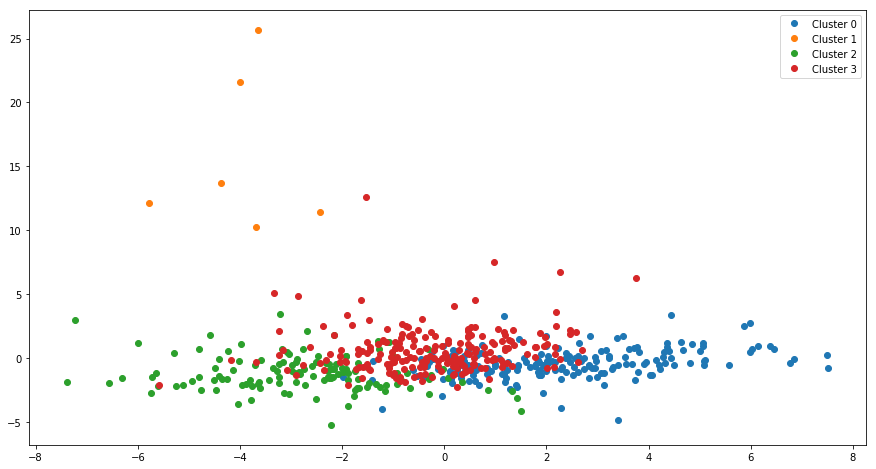

In [14]:
## Result of Hierarchical clustering
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(4):
    tmp_x = x[h_pred == i]
    tmp_y = y[h_pred == i]
    ax.plot(tmp_x, tmp_y, 'o', label='Cluster ' + str(i))
    
plt.legend()
plt.show()

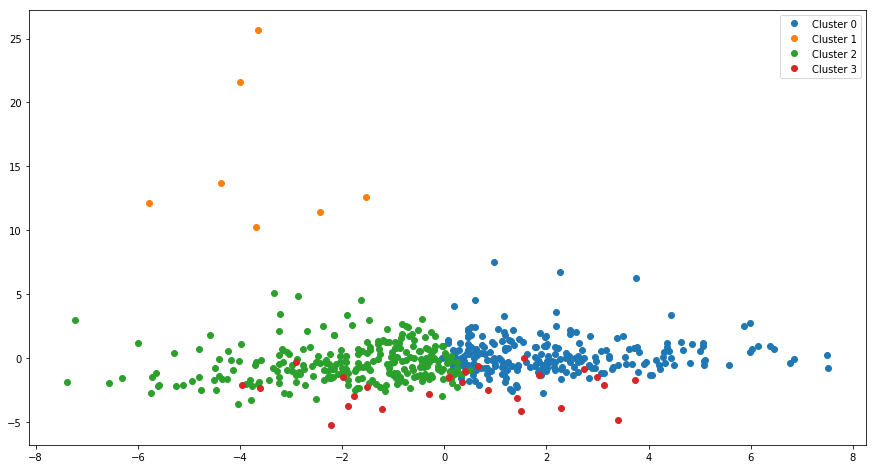

In [15]:
## Result of Hierarchical clustering
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(4):
    tmp_x = x[k_pred == i]
    tmp_y = y[k_pred == i]
    ax.plot(tmp_x, tmp_y, 'o', label='Cluster ' + str(i))
    
plt.legend()
plt.show()

## Find the best K for Kmeans

In [16]:
# find the best cluster number
labels = []
distance = []
ranges = range(2, 11)
for n in ranges:
    model = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                   precompute_distances='auto', verbose=0, n_jobs=-1, algorithm='auto')
    pred = model.fit_predict(ndata)
    labels.append(pred)
    distance.append(model.inertia_)

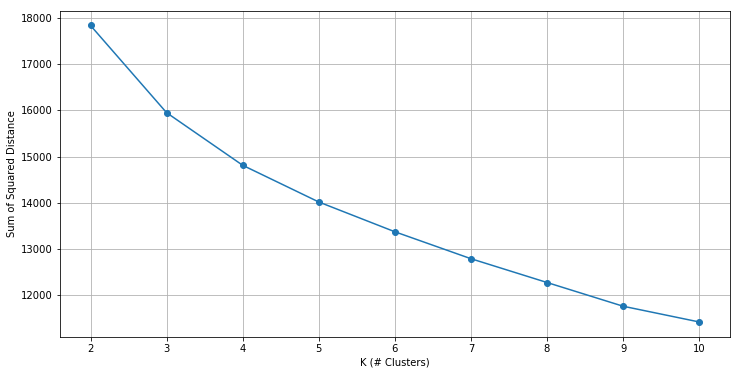

In [17]:
# visualization
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ranges, distance, 'o-')
ax.set_xlabel('K (# Clusters)')
ax.set_ylabel('Sum of Squared Distance')
ax.grid('on')
plt.show()

In [18]:
# viaulaization of mean Silhouette Coefficient and Calinski and Harabaz score
si_score = []
ch_score = []
for idx in range(len(ranges)):
    si_score.append(silhouette_score(ndata, labels[idx]))
    ch_score.append(calinski_harabaz_score(ndata, labels[idx]))

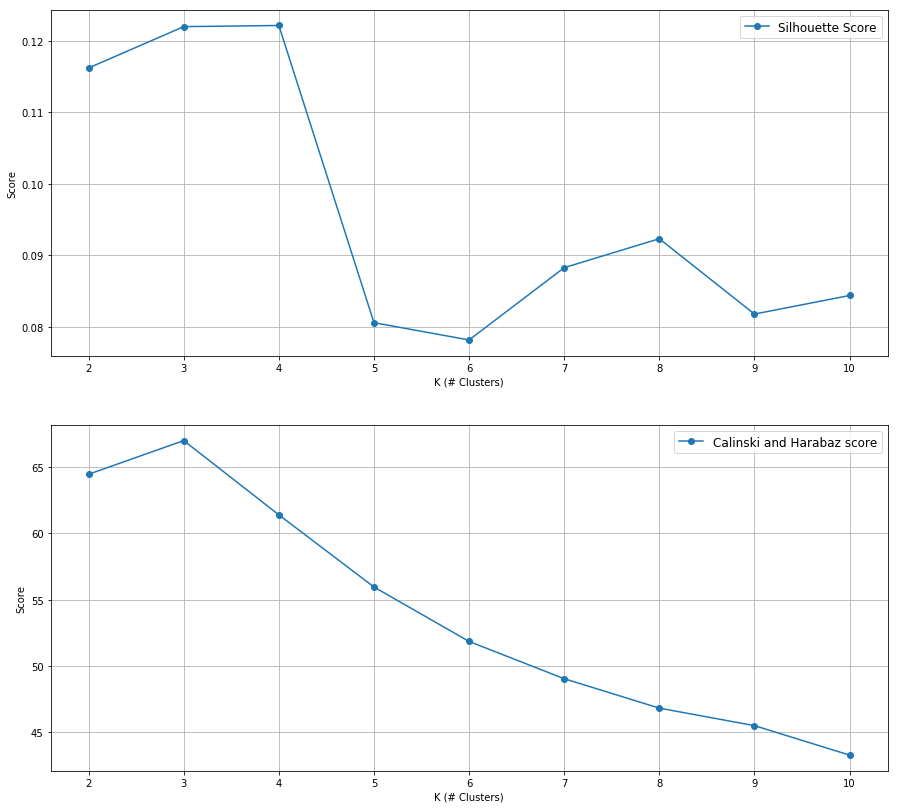

In [19]:
# visualization
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 14))
ax[0].plot(ranges, si_score, 'o-', label='Silhouette Score')
ax[0].set_xlabel('K (# Clusters)')
ax[0].set_ylabel('Score')
ax[0].grid('on')
ax[0].legend(fontsize=12)

ax[1].plot(ranges, ch_score, 'o-', label='Calinski and Harabaz score')
ax[1].set_xlabel('K (# Clusters)')
ax[1].set_ylabel('Score')
ax[1].grid('on')
ax[1].legend(fontsize=12)
plt.show()